In [31]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

# Loading the dataset
data = pd.read_csv('day.csv')
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [33]:
# missing values
data.info()  
data.describe()  

print("Missing Values in each column:")
print(data.isnull().sum())

# Dropping instant and dteday
data = data.drop(['instant', 'dteday'], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
Missing Values in each column:
instant       0
dteday        0
season        0
yr            

In [35]:
# Mapping season and weathersit to categorical labels
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'
})

# Converting categorical variables to dummy variables
data = pd.get_dummies(data, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)


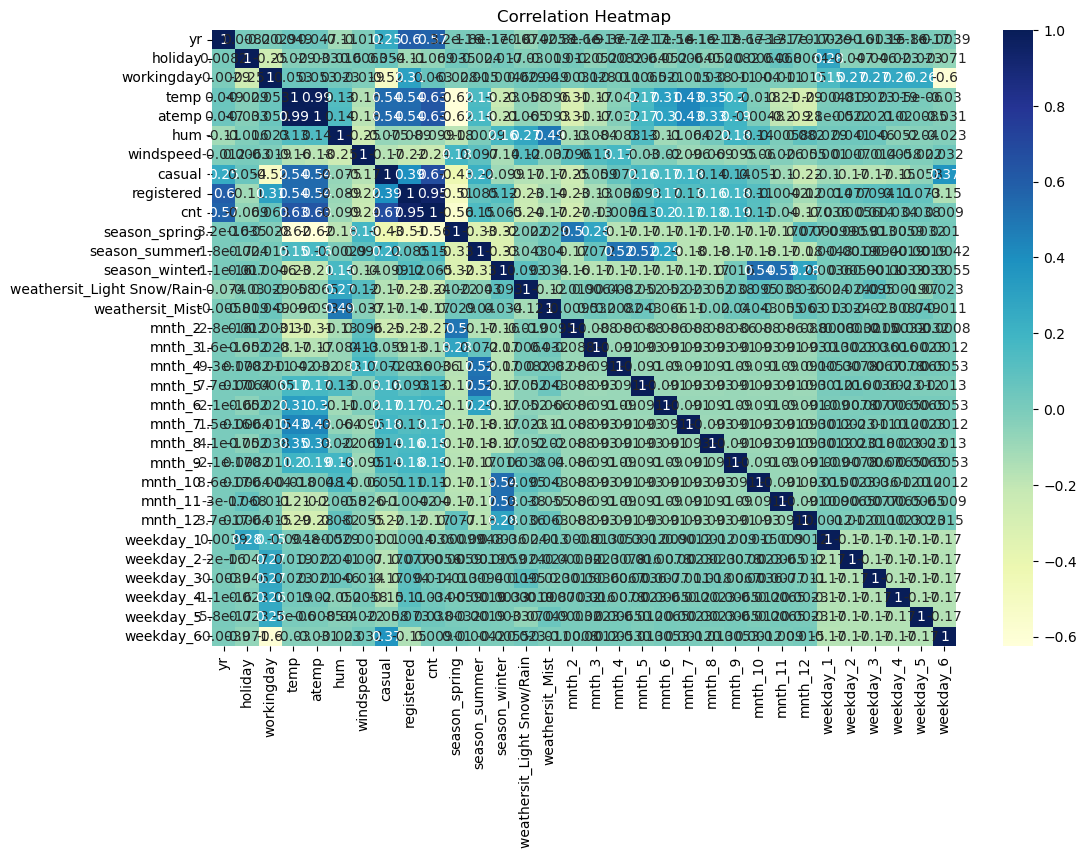

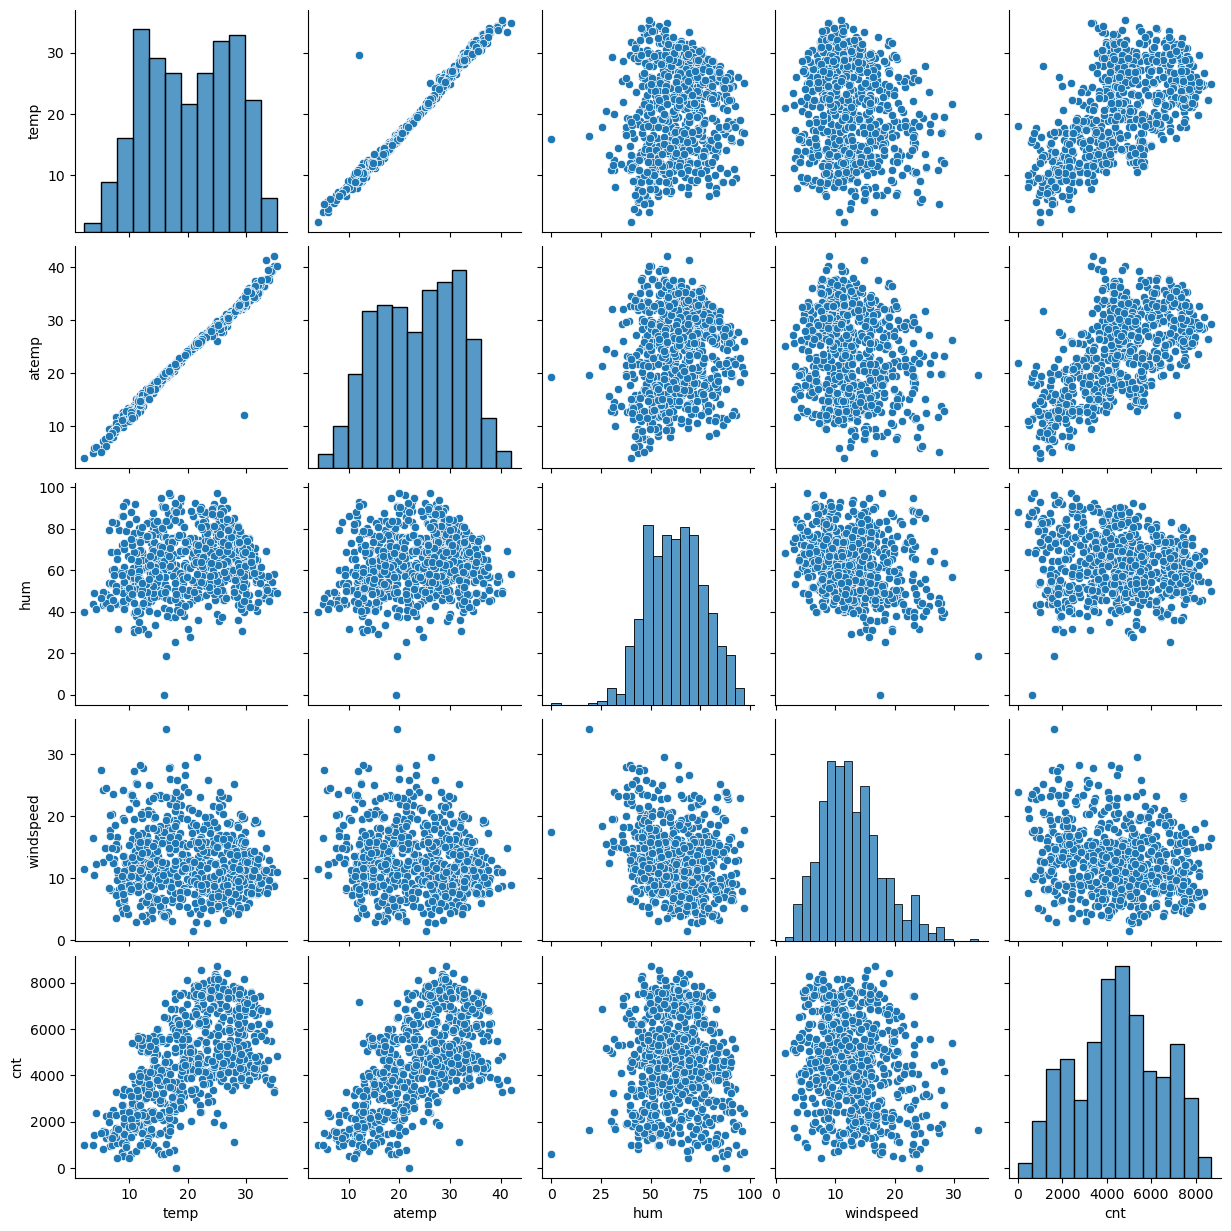

In [37]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(data, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()


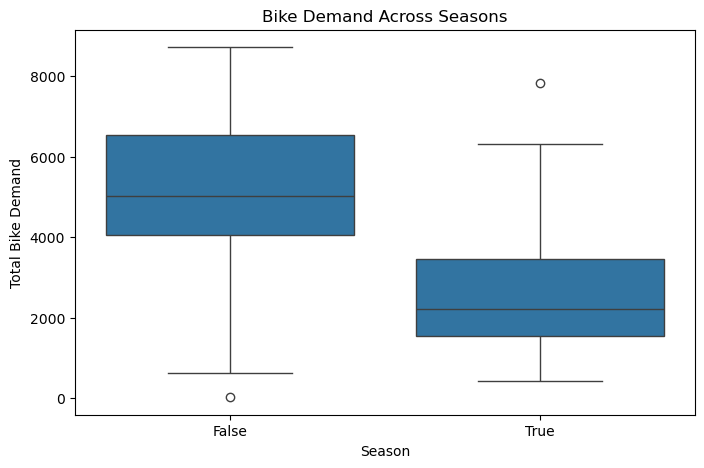

In [47]:
# Average demand per season
plt.figure(figsize=(8, 5))
sns.boxplot(x='season_spring', y='cnt', data=data)
plt.title("Bike Demand Across Seasons")
plt.xlabel("Season")
plt.ylabel("Total Bike Demand")
plt.show()


In [39]:
# Separating features 
X = data.drop(['cnt', 'casual', 'registered'], axis=1)
y = data['cnt']

# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [41]:
# Fitting a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions on test set
y_pred = lr.predict(X_test)


In [43]:
# R-squared on the training set
train_score = r2_score(y_train, lr.predict(X_train))
print(f"Training R-squared: {train_score:.4f}")

# R-squared on the test set
test_score = r2_score(y_test, y_pred)
print(f"Test R-squared: {test_score:.4f}")


Training R-squared: 0.8480
Test R-squared: 0.8368


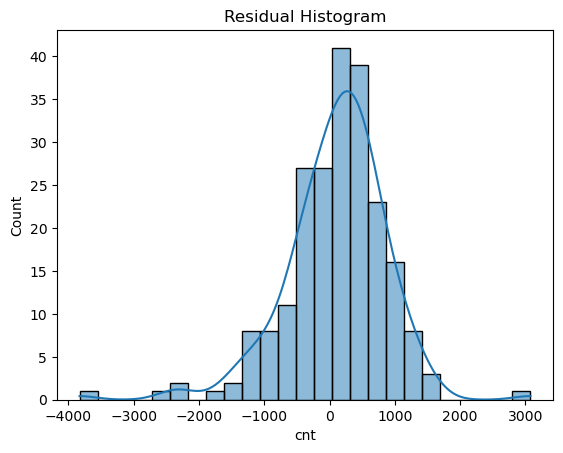

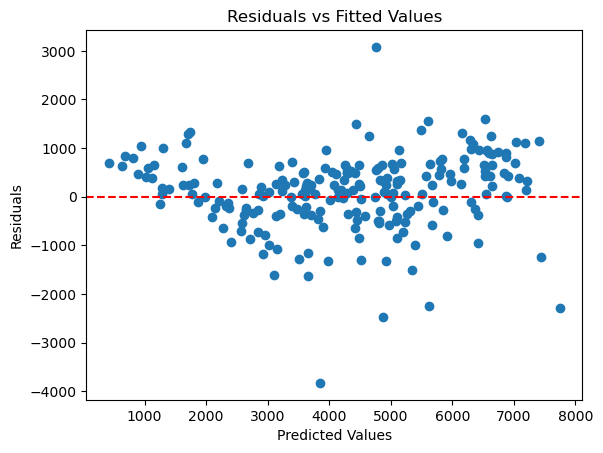

In [45]:
# Plotting residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Histogram")
plt.show()

# Residuals vs Predictions
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()
